In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import tree


In [ ]:
csv_file_name = "RTA.csv"


In [ ]:
df = pd.read_csv( csv_file_name )
df = df.reset_index(drop=True)
df.head(5)

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,1
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2


In [ ]:
target_column_name = "Accident_severity"

In [ ]:
categorical_target_column = True
#categorical_target_column = False


In [ ]:
#Find out number of rows and columns
print(f'Total Number of Rows : {df.shape[0]}')
print(f'Total Number of Columns : {df.shape[1]}')

Total Number of Rows : 12316
Total Number of Columns : 15


In [ ]:
if categorical_target_column :
  print( df[target_column_name].value_counts() )

2    10415
1     1743
0      158
Name: Accident_severity, dtype: int64


OBSERVATION

---

*This is just a sample analysis. Modify and rewrite the sample text according to your dataset*
Here,

2 Means - Slight Injury     10415

1 Means - Serious Injury     1743

0 Means - Fatal injury        158

Text(0.5, 1.0, 'Total Number of Null values for Each Column')

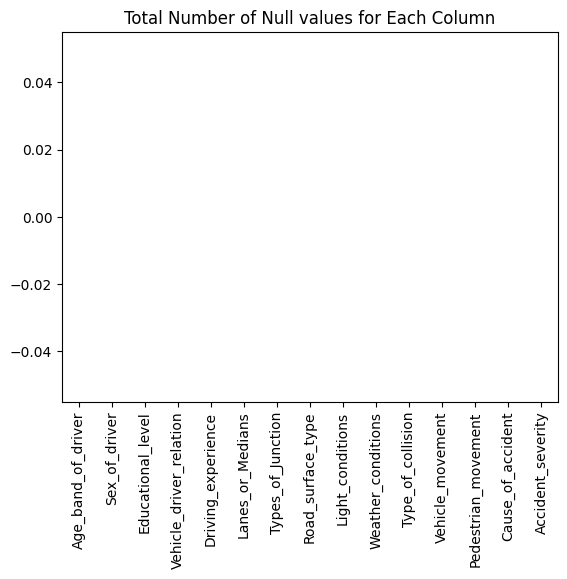

In [ ]:
df.isnull().sum().plot(kind='bar')
plt.title("Total Number of Null values for Each Column")


In [ ]:
#Find out the percentages of null value cout for each column
( df.isnull().sum()/len(df) ) *100


Age_band_of_driver         0.0
Sex_of_driver              0.0
Educational_level          0.0
Vehicle_driver_relation    0.0
Driving_experience         0.0
Lanes_or_Medians           0.0
Types_of_Junction          0.0
Road_surface_type          0.0
Light_conditions           0.0
Weather_conditions         0.0
Type_of_collision          0.0
Vehicle_movement           0.0
Pedestrian_movement        0.0
Cause_of_accident          0.0
Accident_severity          0.0
dtype: float64

In [ ]:
droped_column_names = [ "Age_band_of_driver" , "Pedestrian_movement" , "Driving_experience"]

df.drop( droped_column_names , axis = 1 ,inplace = True)

In [ ]:
target_columns = ['Sex_of_driver', 'Educational_level', 'Light_conditions', 'Road_surface_type' , 'Vehicle_driver_relation']

for column in target_columns:
    if df[column].dtype == "object":
        label_encoder = LabelEncoder()
        label_encoder.fit(df[column])
        df[column] = label_encoder.transform(df[column])
df

,Sex_of_driver,Educational_level,Vehicle_driver_relation,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Cause_of_accident,Accident_severity
0,1,0,0,Unknown,No junction,0,3,Normal,Collision with roadside-parked vehicles,Going straight,Moving Backward,2
1,1,4,0,Undivided Two way,No junction,0,3,Normal,Vehicle with vehicle collision,Going straight,Overtaking,2
2,1,4,0,other,No junction,0,3,Normal,Collision with roadside objects,Going straight,Changing lane to the left,1
3,1,4,0,other,Y Shape,2,0,Normal,Vehicle with vehicle collision,Going straight,Changing lane to the right,2
4,1,4,0,other,Y Shape,0,0,Normal,Vehicle with vehicle collision,Going straight,Overtaking,2
...,...,...,...,...,...,...,...,...,...,...,...,...
12311,1,5,0,Undivided Two way,No junction,0,3,Normal,Vehicle with vehicle collision,Going straight,No distancing,2
12312,1,1,0,Two-way (divided with broken lines road marking),No junction,0,3,Normal,Vehicle with vehicle collision,Other,No distancing,2
12313,1,4,0,Two-way (divided with broken lines road marking),No junction,0,3,Normal,Vehicle with vehicle collision,Other,Changing lane to the right,1
12314,0,4,0,Undivided Two way,No junction,0,0,Normal,Vehicle with vehicle collision,Other,Driving under the influence of drugs,2


In [ ]:
# If total number of missing value is less than 5% then drop it otherwise fill using backward fill/forward fill.

print(f'Maximum Null values in column (Before Handling)  : { df.isnull().sum().max() }')

if (df.isnull().sum().max() > len(df) ) * 0.05:
  print("\n------Dropped Null Values-------\n")
  df.dropna( inplace = True)
else:
  print("\n------Replaced Null Values-------\n")
  df.fillna( method = 'bfill' , inplace = True) # You can use 'ffill' to forward fill


print(f'Maximum Null values in column (After Handling)  : { df.isnull().sum().max() }')



Maximum Null values in column (Before Handling)  : 0

------Replaced Null Values-------

Maximum Null values in column (After Handling)  : 0


In [ ]:
#Duplicate entry count
df.duplicated().value_counts()

print( ( df.duplicated().value_counts()/len(df) ) * 100)

False    79.270867
True     20.729133
dtype: float64


OBSERVATION

---
There are 0.44 % duplicate entries in this data set


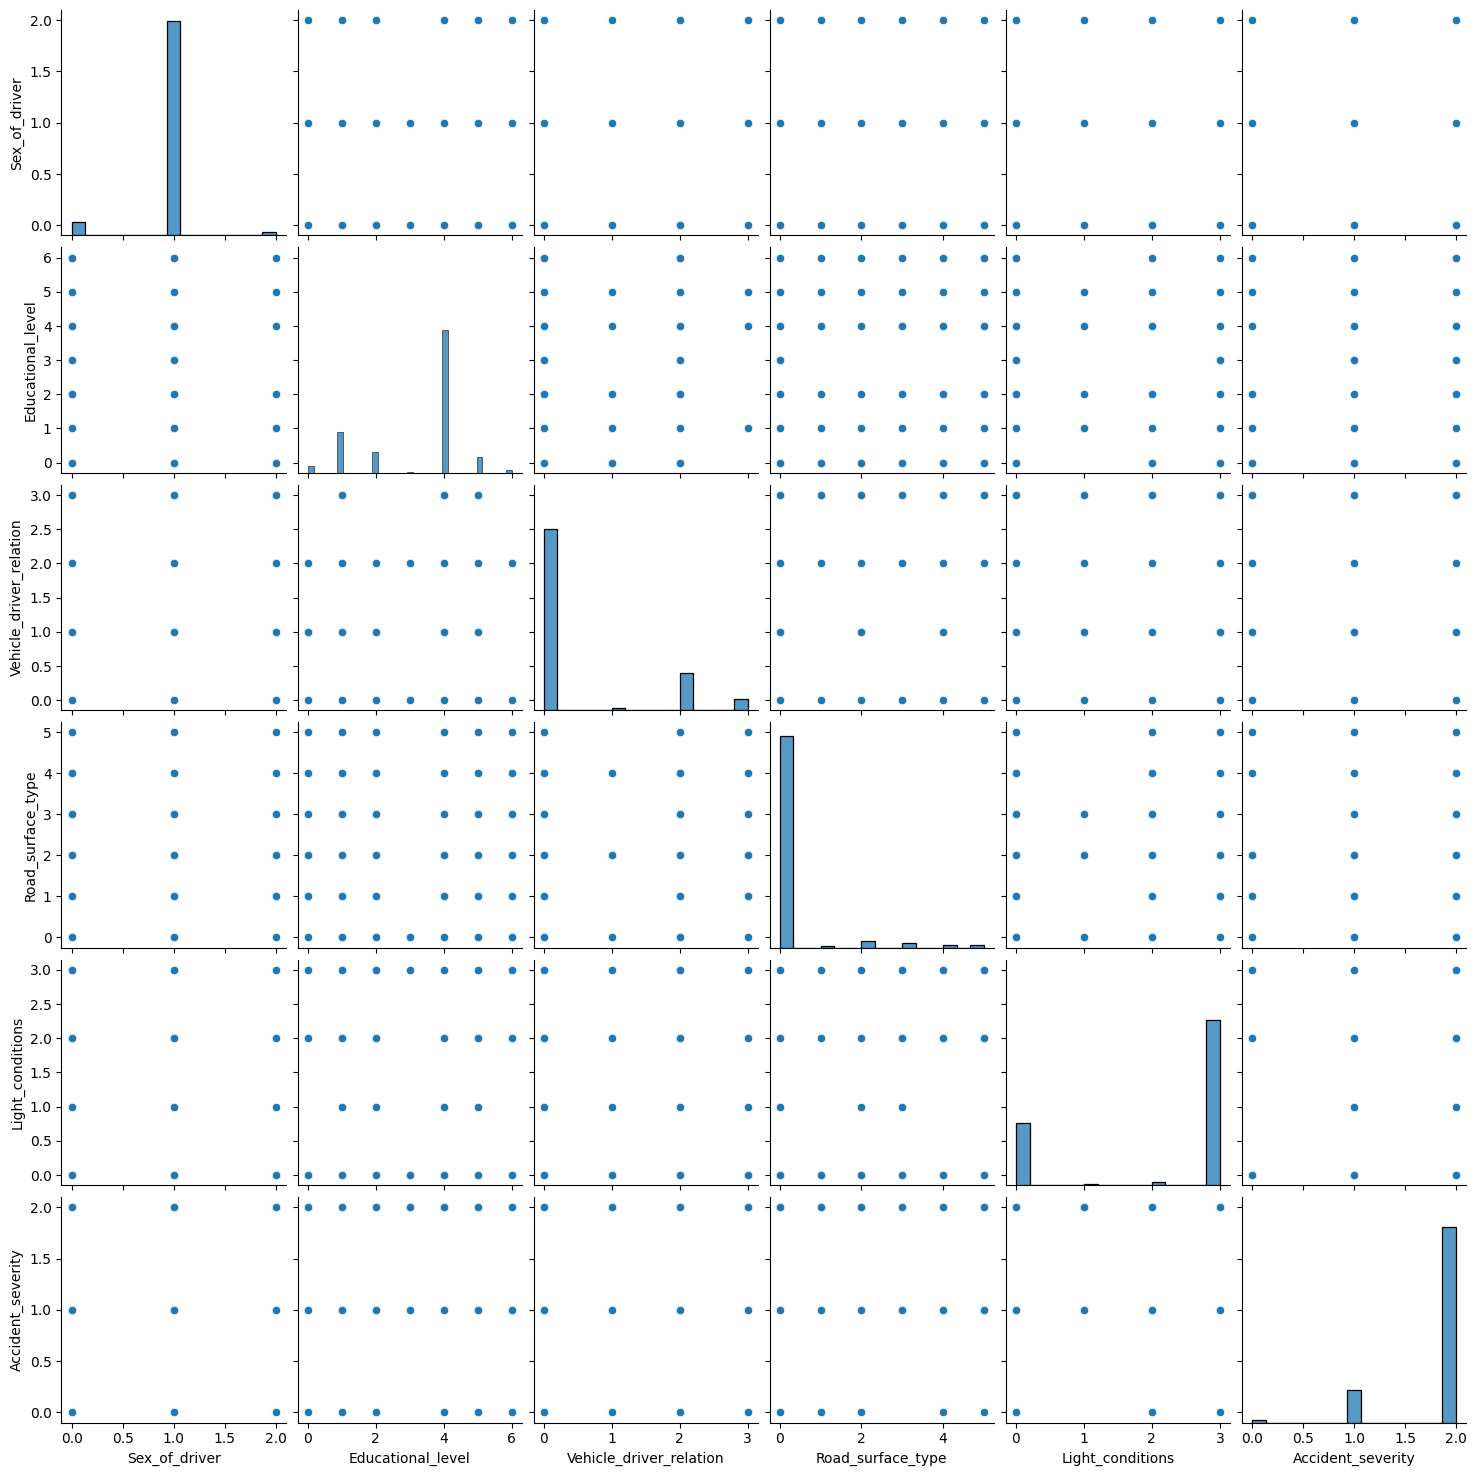

In [ ]:
#Pair Plot Gives you an overall insight on how the data's are distributed
sns.pairplot( df )

OBSERVATION

---
From the pair plot above some of the observations are :-   

1.    **Sexx_of_Driver** : From the histogram analysis it can be observed that the graph is Symetric. Also , most of them are Male.

2.   **Accident_severity** : Highly left-skewed. It means Slightly injory is high.

3.  **Road_surface_type** : Highly right-skewed, road surface type Asphalt roads.

4.  **Educational_level** : Left skewed, in population most of the population are from Junior high school.

5.  **Light_conditions** : Highly left-skewed, most of the accidemt occur in Daylight.

6.  **Vehicle_driver_relation** : Highly right-skewed, most of the drivers are employees.

 *This is just a sample analysis shown . You have to write all the observations you found* .




In [ ]:
df.info()

print("\n\n-----------------Unique Values per column--------------------------------\n\n")

df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Sex_of_driver            12316 non-null  int64 
 1   Educational_level        12316 non-null  int64 
 2   Vehicle_driver_relation  12316 non-null  int64 
 3   Lanes_or_Medians         12316 non-null  object
 4   Types_of_Junction        12316 non-null  object
 5   Road_surface_type        12316 non-null  int64 
 6   Light_conditions         12316 non-null  int64 
 7   Weather_conditions       12316 non-null  object
 8   Type_of_collision        12316 non-null  object
 9   Vehicle_movement         12316 non-null  object
 10  Cause_of_accident        12316 non-null  object
 11  Accident_severity        12316 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 1.1+ MB


-----------------Unique Values per column--------------------------------




Sex_of_driver               3
Educational_level           7
Vehicle_driver_relation     4
Lanes_or_Medians            7
Types_of_Junction           8
Road_surface_type           6
Light_conditions            4
Weather_conditions          9
Type_of_collision          10
Vehicle_movement           13
Cause_of_accident          20
Accident_severity           3
dtype: int64

In [ ]:
categorical_columns = [ "Types_of_Junction" , "Weather_conditions","Type_of_collision","Vehicle_movement","Cause_of_accident"]
numeric_columns = ["Accident_severity", "Sex_of_driver" ,"Educational_level","Road_surface_type","Vehicle_driver_relation","Light_conditions"]

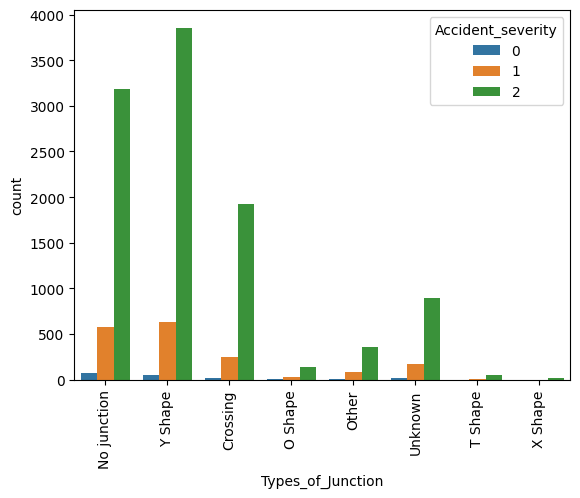

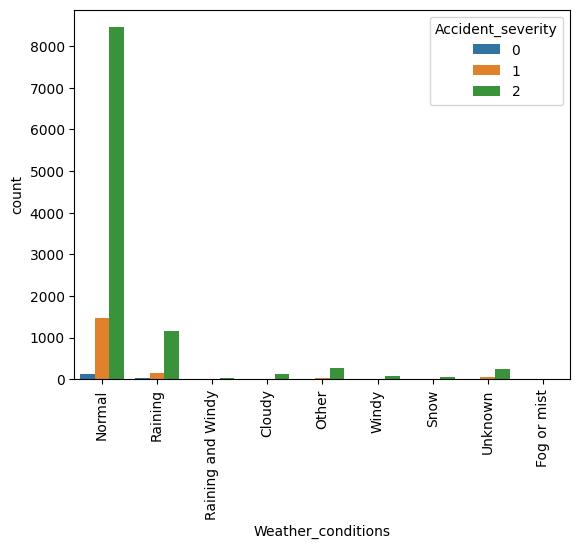

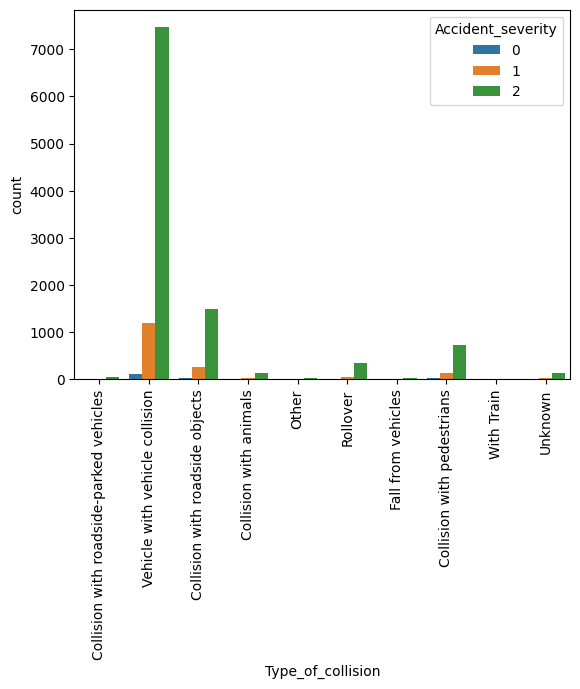

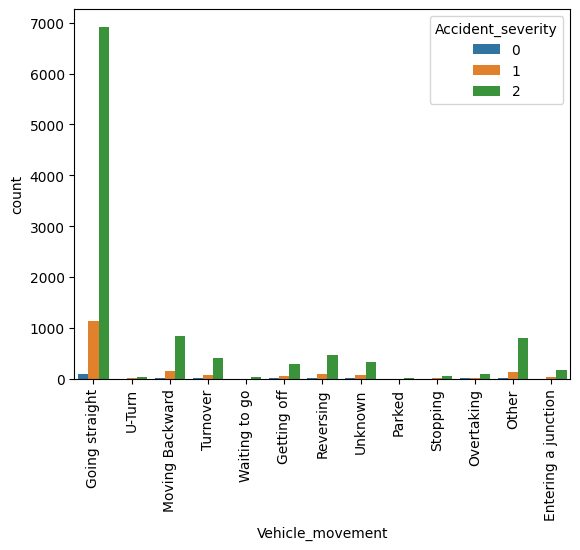

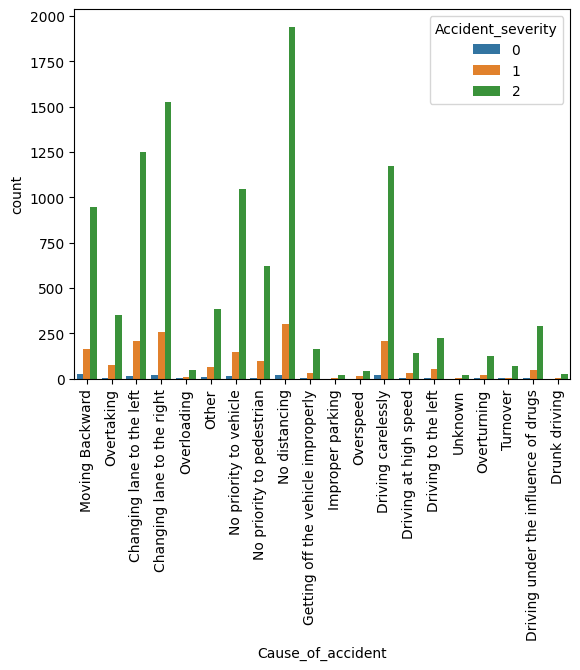

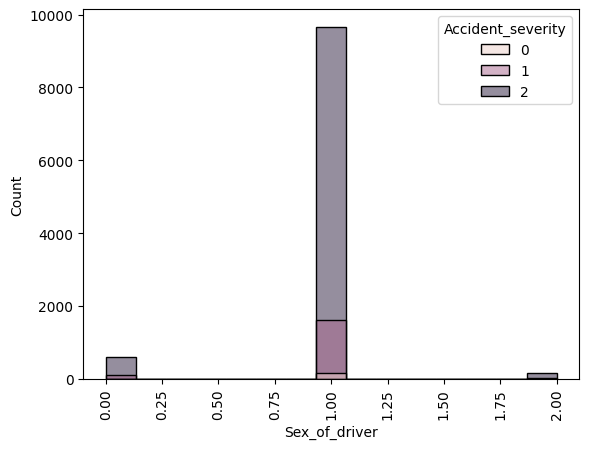

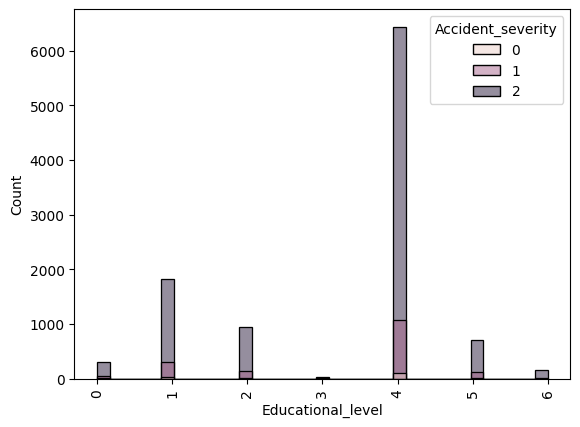

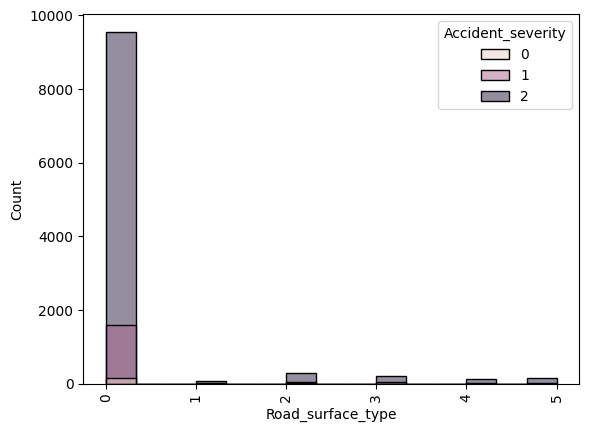

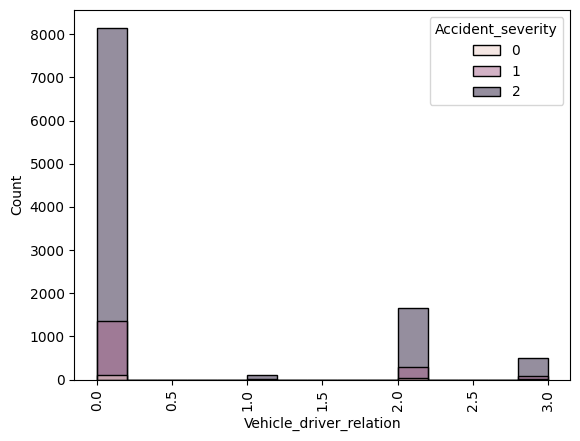

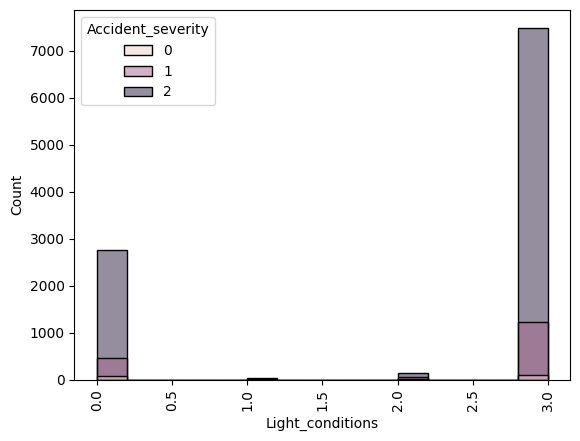

In [ ]:
if categorical_target_column:
  for column in categorical_columns:
    if column != target_column_name:
      #sns.barplot(x=column, y='Counts', hue= target_column_name, data= df.groupby([column, target_column_name]).size().reset_index(name="Counts"))
      plt.xticks(rotation=90)
      sns.countplot( x = column , hue = target_column_name , data = df )
      plt.show()

  for column in numeric_columns:
    if column != target_column_name:
      plt.xticks(rotation=90)
      sns.histplot( x = column , hue = target_column_name , data = df)
      plt.show()

else:
  for column in categorical_columns:
      if column != target_column_name:
        plt.xticks(rotation=90)
        sns.histplot( x = target_column_name , hue = column , data = df)
        plt.show()

  for column in numeric_columns:
    if column != target_column_name:
      plt.xticks(rotation=90)
      sns.scatterplot( x = target_column_name , y = column , data = df)
      plt.show()



OBSERVATION

---


1.   **Accident_severity and Sex_of_casualty**: From the count plot it can be observed that number of Slight Injury passengers is amazingly high in Male. Unknown gender has the least accident rate.

2.  **Accident_severity and Educational_level** : Analysis reveals that a higher proportion of Junior high school drivers survived, least survived Illiterate drivers.

3. **Accident_severity and Road_surface_type** : In Asphalt roads most survived.

4. **Accident_severity and Vehicle_driver_relation** : Most of the employees of drivers are  Slight Injured and survived.

5. **Accident_severity and Light_conditions** : Most of the accident occured in daylight and also survived.

6. **Accident_severity and Types_of_Junction** : Most survived in Y shape junction.

7. **Accident_severity and Weather_conditions** : Survival weather condition was Normal.

8. **Accident_severity and Type_of_collision** : Most ooof the collusion was vehicle with vehicle collusion.

9. **Accident_severity and Vehicle_movement** : When acciden occur most of thhe vehicle was going straight.

10. **Accident_severity and Cause_of_accident** : No distencing was the root cause of accident.

 *This is just a sample analysis shown . You have to write all the observations you found* .


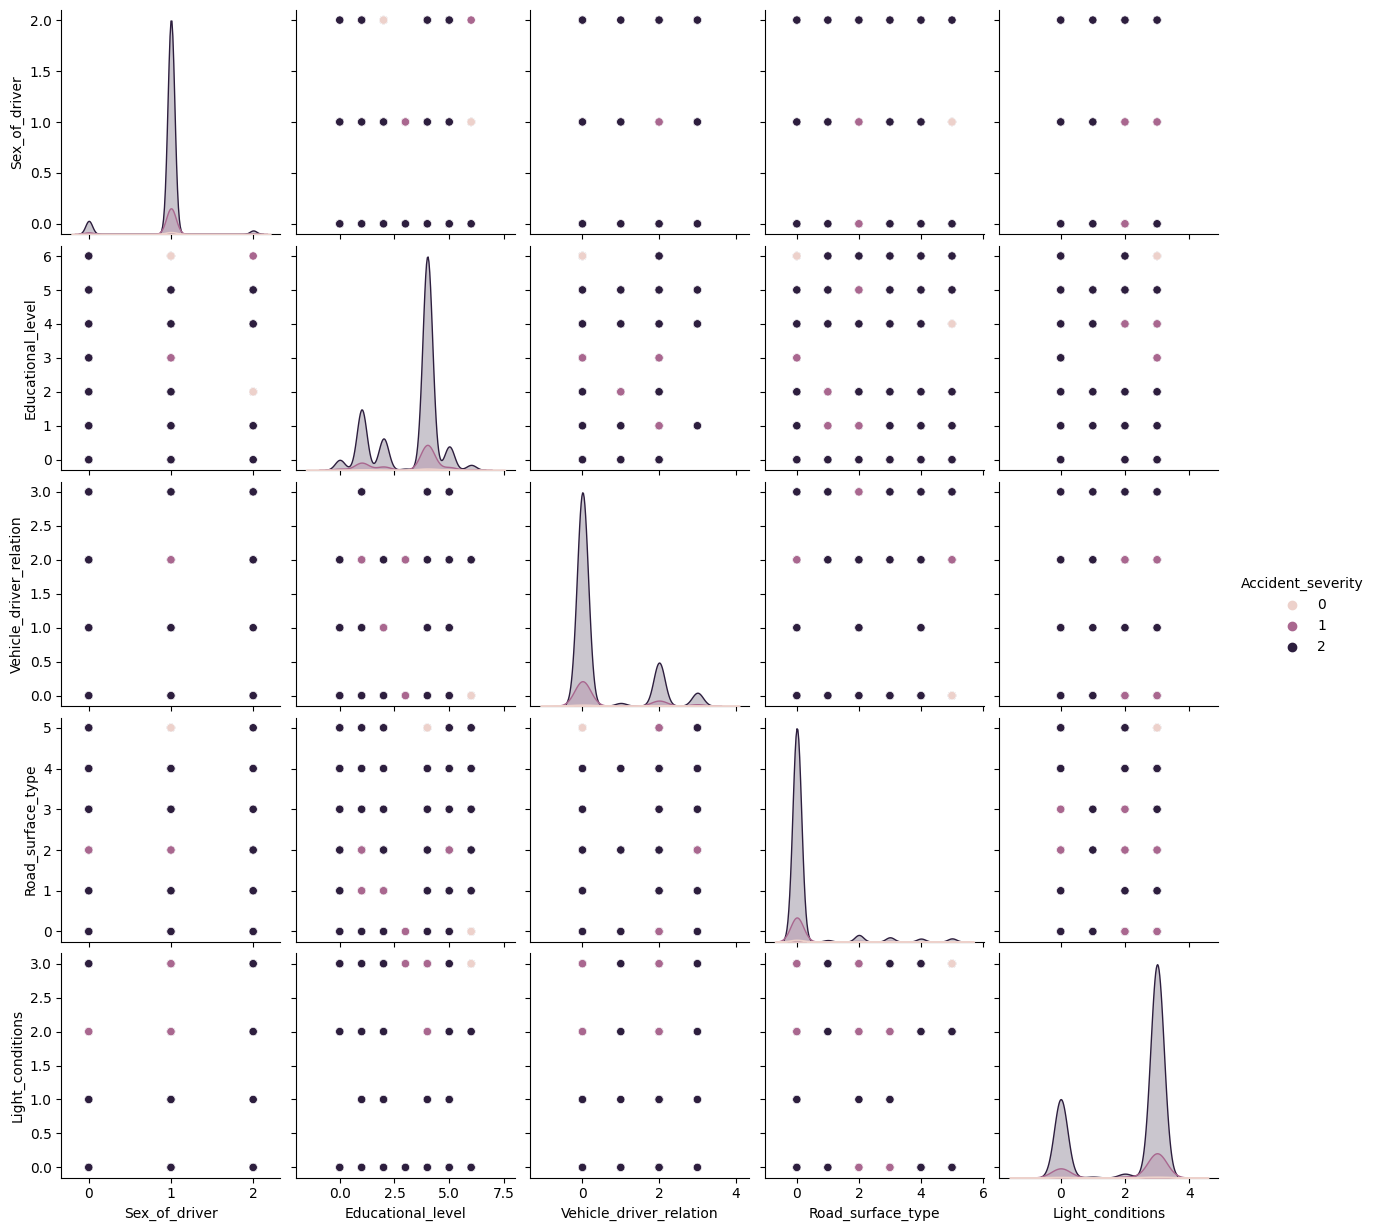

In [ ]:
if categorical_columns:
  sns.pairplot( data=df , hue = target_column_name)

OBSERVATION

---

 *You have to write all the observations you found* .

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Sex_of_driver            12316 non-null  int64 
 1   Educational_level        12316 non-null  int64 
 2   Vehicle_driver_relation  12316 non-null  int64 
 3   Lanes_or_Medians         12316 non-null  object
 4   Types_of_Junction        12316 non-null  object
 5   Road_surface_type        12316 non-null  int64 
 6   Light_conditions         12316 non-null  int64 
 7   Weather_conditions       12316 non-null  object
 8   Type_of_collision        12316 non-null  object
 9   Vehicle_movement         12316 non-null  object
 10  Cause_of_accident        12316 non-null  object
 11  Accident_severity        12316 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 1.1+ MB


<Axes: >

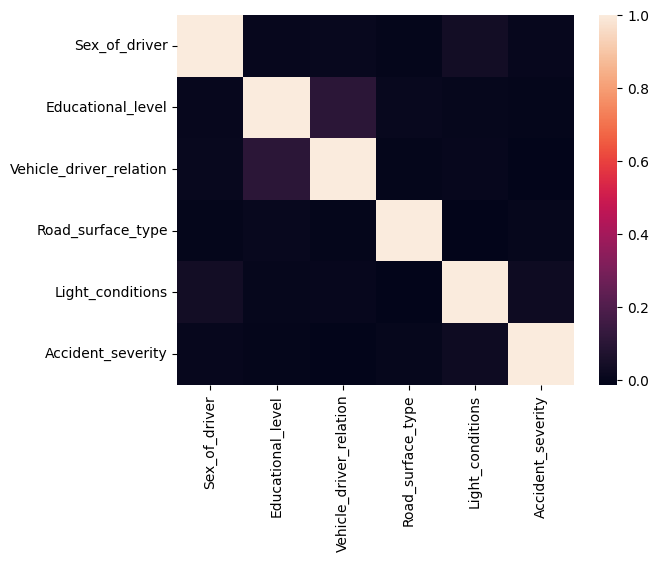

In [ ]:
#Correlation HeatMap for numeric columns among the dataset
sns.heatmap(df.corr( numeric_only =  True))

OBSERVATION

---

The heatmap shows that there is a negative correlation between educational level and accident severity. This means that drivers with higher levels of education tend to be involved in fewer accidents. The heatmap also shows that there is a positive correlation between vehicle driver relation and Educational_level.


 *This is just a sample analysis shown . You have to write all the observations you found* .



Features and labels are stored in different variables. Categorical columns are encoded using OrdinalEncoder .

In [ ]:
X = df.drop(target_column_name , axis=1 )
y =  df[target_column_name]

enc = OrdinalEncoder()
X = enc.fit_transform( X )


le = LabelEncoder()
target_class = y.unique()
y = le.fit_transform( y )


In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        52
           1       0.00      0.00      0.00       552
           2       0.84      1.00      0.91      3091

    accuracy                           0.84      3695
   macro avg       0.28      0.33      0.30      3695
weighted avg       0.70      0.84      0.76      3695



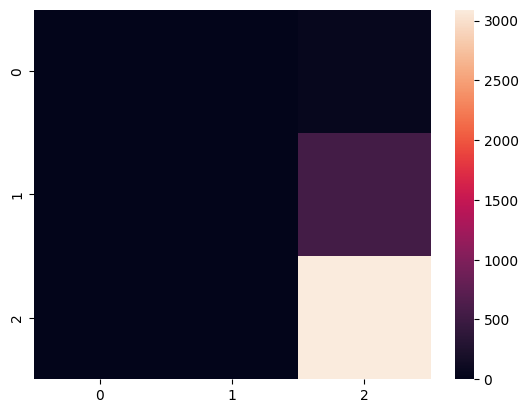

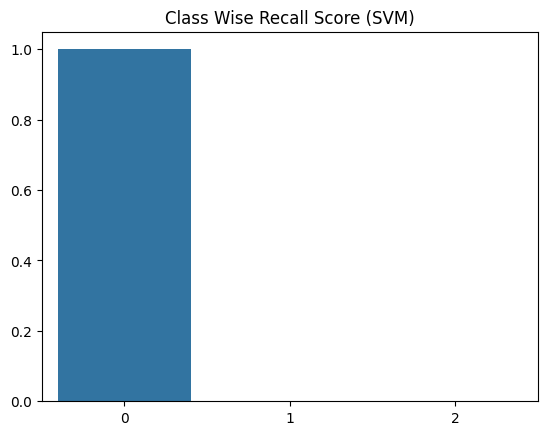

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


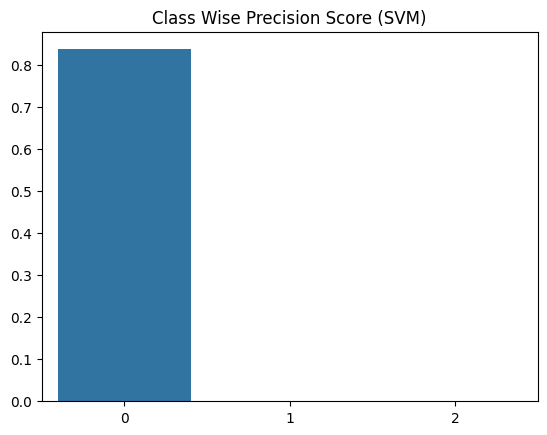

In [ ]:
if categorical_target_column:
  clf = SVC()
  clf.fit( X_train , y_train )
  y_pred = clf.predict( X_test )

  print( classification_report( y_test , y_pred ) )

  matrix = confusion_matrix( y_test , y_pred )
  sns.heatmap( matrix )
  plt.show()

  sns.barplot( x = target_class ,y = recall_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Recall Score (SVM)")
  plt.show()

  sns.barplot( x = target_class ,y = precision_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Precision Score (SVM)")
  plt.show()

else:
  #apply linear regression . As shown in lab
  print("You Need to use Linear Regression as your target column in Numeric")

OBSERVATION

---


The heatmap shows that the model is very good at predicting Slight Injury (2), with a precision of 0.84, recall of 1.00, and F1-score of 0.91. The model is also good at predicting fatal injuries (0), with a precision of 0.00, recall of 0.00, and F1-score of 0.00. However, the model is not very good at predicting Serious Injury (1), with a precision of 0.00, recall of 0.00, and F1-score of 0.00.

*This is just a sample analysis.*

              precision    recall  f1-score   support

           0       0.02      0.02      0.02        52
           1       0.18      0.20      0.19       552
           2       0.84      0.83      0.84      3091

    accuracy                           0.73      3695
   macro avg       0.35      0.35      0.35      3695
weighted avg       0.73      0.73      0.73      3695



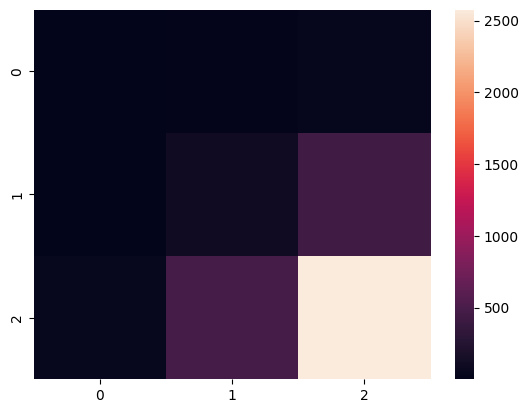

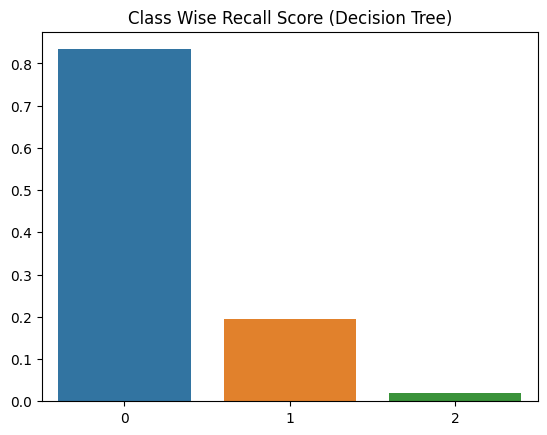

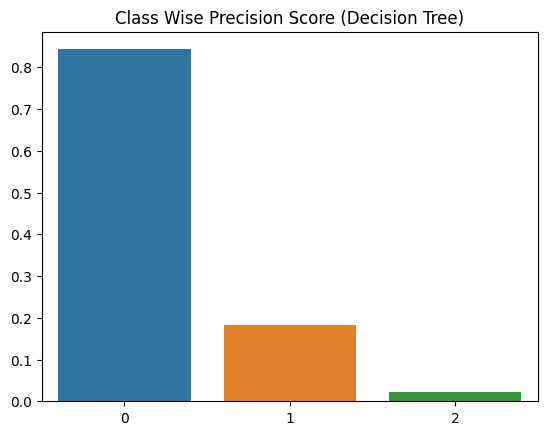

In [ ]:
if categorical_target_column:
  clf = tree.DecisionTreeClassifier()
  clf.fit( X_train , y_train )
  y_pred = clf.predict( X_test )

  print( classification_report( y_test , y_pred ) )

  matrix = confusion_matrix( y_test , y_pred )
  sns.heatmap( matrix )
  plt.show()

  sns.barplot( x = target_class ,y = recall_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Recall Score (Decision Tree)")
  plt.show()

  sns.barplot( x = target_class ,y = precision_score( y_test , y_pred , average =  None) )
  plt.title( "Class Wise Precision Score (Decision Tree)")
  plt.show()

else:
  #apply linear regression . As shown in lab
  print("You Need to use Linear Regression as your target column in Numeric")

OBSERVATION

---

The decision tree model applied to the RTA dataset achieved an overall accuracy of 73%. It showed higher precision (correct positive predictions among predicted positives) for Slight Injury (84%) compared to Serious Injury and Fatal injury (18% and 2%). The recall (true positive rate) was higher for Slight Injury (84%) compared to Serious Injury, Fatal injury (19%, 2%). The F1-score, a balanced metric considering precision and recall, was 0.84 for Slight Injury and 0.19 for Serious Injury, for Fatal injury it was 0.02.



*This is just a sample analysis.*